In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]

In [6]:
single_image.shape

(28, 28)

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

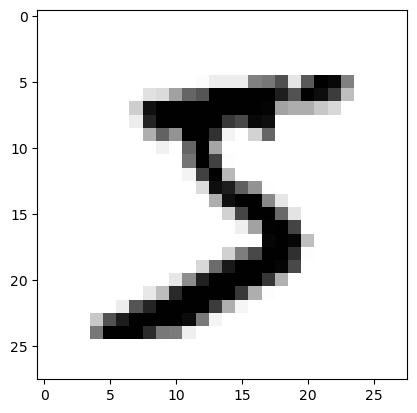

In [8]:
plt.imshow(single_image, cmap='binary')

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test)

In [17]:
y_cat_train = to_categorical(y_train)

In [18]:
X_train = X_train/255

In [19]:
X_test = X_test/255

In [20]:
scaled_image = X_train[0]

In [21]:
scaled_image.max()

1.0

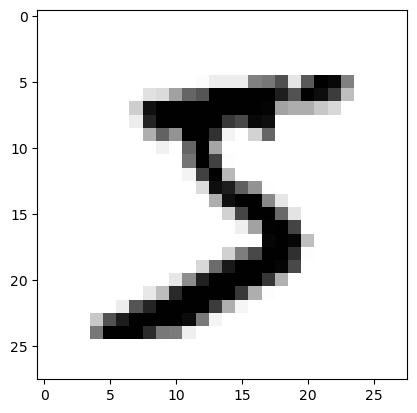

In [22]:
plt.imshow(scaled_image, cmap='binary')

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [25]:
X_train.shape

(60000, 28, 28, 1)

In [26]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [27]:
X_test.shape

(10000, 28, 28, 1)

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [55]:
model = Sequential()

In [56]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=2)

# Early stopping is basically stopping the training once your loss starts
# to increase (or in other words validation accuracy starts to decrease)
# patience is no.of epochs after decrease or increase.

In [65]:
model.fit(X_train, y_cat_train, epochs=10, batch_size=16, validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0575 - val_accuracy: 0.9879
Epoch 2/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0669 - val_accuracy: 0.9877
Epoch 3/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0600 - val_accuracy: 0.9885
Epoch 4/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0610 - val_accuracy: 0.9881
Epoch 5/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0603 - val_accuracy: 0.9887
Epoch 6/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0632 - val_accuracy: 0.9890
Epoch 7/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0806 - val_ac

In [36]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.141422,0.957800,0.051567,0.9831
1,0.047968,0.985033,0.042232,0.9858
2,0.031651,0.989950,0.036920,0.9866
3,0.021306,0.993267,0.036077,0.9890
4,0.013699,0.995567,0.038286,0.9881
5,0.010222,0.996733,0.040867,0.9890


<Axes: >

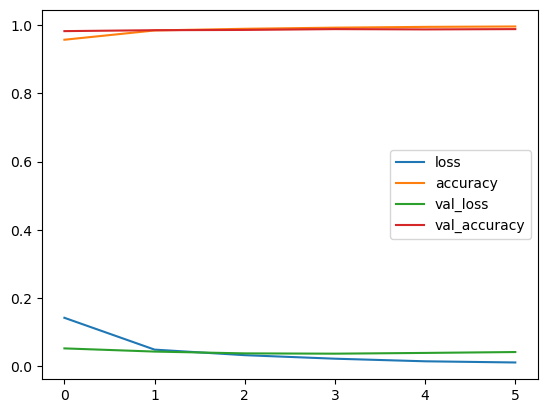

In [37]:
metrics.plot()

<Axes: >

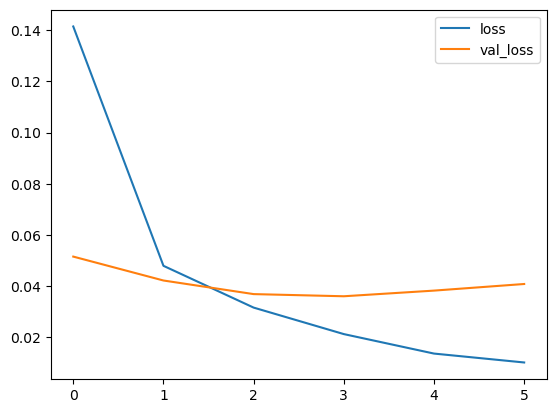

In [38]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

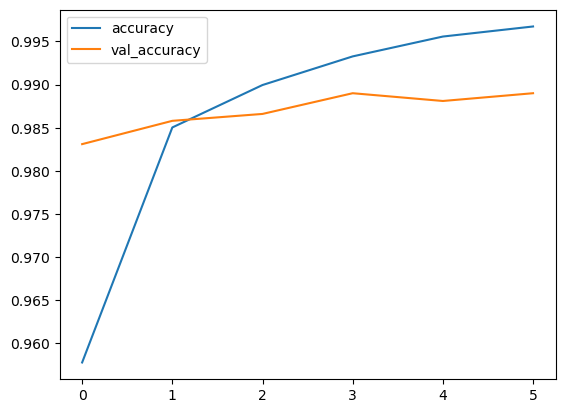

In [39]:
metrics[['accuracy', 'val_accuracy']].plot()

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
model.evaluate(X_test, y_cat_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9890


[0.04086736589670181, 0.9890000224113464]

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
predictions = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [44]:
predictions.shape

(10000, 10)

In [45]:
class_predictions = np.argmax(predictions, axis=1)

In [46]:
class_predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [47]:
print(classification_report(y_test, class_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [48]:
confusion_matrix(y_test, class_predictions)

array([[ 975,    0,    0,    0,    0,    0,    2,    0,    1,    2],
       [   0, 1133,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0,    2, 1021,    0,    1,    0,    2,    6,    0,    0],
       [   0,    0,    5,  997,    0,    2,    0,    3,    2,    1],
       [   0,    0,    0,    0,  977,    0,    1,    0,    0,    4],
       [   1,    0,    1,    6,    0,  879,    1,    0,    3,    1],
       [   2,    4,    0,    0,    3,    3,  944,    0,    2,    0],
       [   0,    0,    6,    1,    1,    0,    0, 1016,    1,    3],
       [   2,    1,    6,    0,    0,    0,    0,    4,  957,    4],
       [   0,    2,    0,    0,   11,    1,    0,    4,    0,  991]],
      dtype=int64)

In [49]:
my_num = X_test[0]

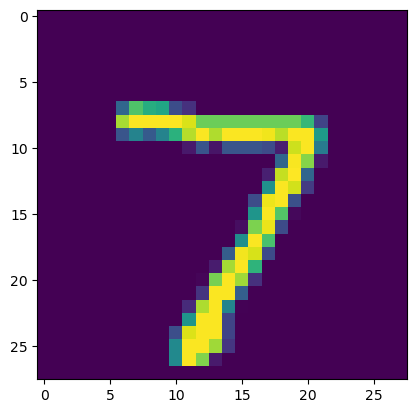

In [50]:
plt.imshow(my_num.reshape(28,28))

In [53]:
predicted_my_num = np.argmax(model.predict(my_num.reshape(1,28,28,1)), axis=1)
predicted_my_num

1/1 [==============================] - 0s 18ms/step


array([7], dtype=int64)